In [36]:
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import pydotplus 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [66]:
iperf1 = pd.read_csv('/Users/xiongzhaoqi/Cambridge/Project/traces1000/iperf.csv')
iperf = iperf1.values.tolist()
memcached1 = pd.read_csv('/Users/xiongzhaoqi/Cambridge/Project/traces1000/memcached.csv')
memcached = memcached1.values.tolist()
ping1 = pd.read_csv('/Users/xiongzhaoqi/Cambridge/Project/traces1000/ping.csv')
ping = ping1.values.tolist()
sparkglm1 = pd.read_csv('/Users/xiongzhaoqi/Cambridge/Project/traces1000/sparkglm.csv')
sparkglm = sparkglm1.values.tolist()
sparkkmeans1 = pd.read_csv('/Users/xiongzhaoqi/Cambridge/Project/traces1000/sparkkmeans.csv')
sparkkmeans = sparkkmeans1.values.tolist()
X = iperf + memcached + ping + sparkglm + sparkkmeans
#X = memcached + ping 
Y = 1000*[0] + 1000*[2]  + 1000*[3] + 1000*[1] + 1000* [4]

In [77]:
X = np.array(X)
Y = np.array(Y)

In [78]:
kmeans = KMeans(n_clusters=5, random_state= 9).fit(X)
y_pred = kmeans.predict(X)

In [79]:
print(classification_report(Y ,y_pred))
print(accuracy_score(Y ,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.88      0.95      0.91      1000
           2       0.90      0.51      0.65      1000
           3       0.00      0.00      0.00      1000
           4       1.00      0.81      0.90      1000

   micro avg       0.65      0.65      0.65      5000
   macro avg       0.66      0.65      0.62      5000
weighted avg       0.66      0.65      0.62      5000

0.653


In [80]:
print(y_pred[1000:2000])

[2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 2 2 2 2 2 3 3 2 2 2 2 3 2 2
 3 2 3 2 2 2 2 3 2 3 2 3 3 3 3 2 3 3 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 3 3 3 3 3 2 3 2 2 3 2 2 2 3 2 2 2 2 2 2 3 2 3 2 3 2 2 3 2 3
 2 3 3 2 2 3 2 3 3 2 3 3 3 2 2 3 3 2 2 3 2 2 2 2 3 2 2 2 3 3 2 3 2 3 2 3 3
 3 3 3 2 3 2 2 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3
 2 2 3 3 3 2 3 3 3 3 3 3 2 2 2 2 3 2 3 2 3 2 3 3 2 3 3 2 3 3 3 3 2 2 2 2 2
 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 2 3 2 2 2 2 3 2 2 2 2
 3 2 2 2 2 3 2 2 2 2 2 2 3 3 3 3 3 3 3 2 3 3 3 3 2 2 3 2 2 2 2 2 2 2 3 2 2
 3 2 3 2 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 2 3 2 2 3 2 3 3 3 3 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 3 3 3 3
 2 2 3 2 3 3 3 3 3 3 2 3 3 3 3 2 2 2 2 3 2 2 2 2 3 2 2 3 2 3 3 2 2 2 2 2 2
 2 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 2 2 3 2 2 2 3 2 2 3
 2 3 2 3 3 3 2 3 3 3 2 3 2 3 3 3 3 3 2 2 2 2 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2
 3 3 3 3 3 3 3 2 2 3 3 3 

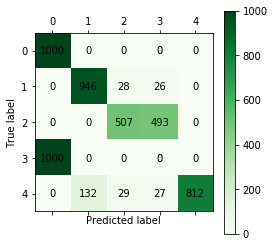

In [81]:
cm = confusion_matrix(Y ,y_pred)
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(5):
    for y in range(5):
        plt.annotate(cm[y,x],xy=(x,y),horizontalalignment='center',verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [76]:
print(kmeans.cluster_centers_)

[[ 2500.5         2500.5       ]
 [37233.86827458 37209.34508349]
 [39498.29432624 10280.33865248]
 [10267.02197802 39496.06959707]
 [48485.35714286 48310.84236453]]
